# Homework 1
## Introduction
### Important dates
* Homework release: Thursday, 3rd October 2019
* **Homework due**: Wednesday, 16th October 2019 (23:59 hours, 11:59 PM)
* Peer review due: Wednesday, 23rd October 2019 (23:59 hours, 11:59 PM)
* Grading release: Wednesday, 30th October 2019

### Description

The data you'll be working with comes from multiple sources. The main data source will be [DBLP](https://dblp.uni-trier.de/), a database of publications from major computer science journals and conferences. A subset of DBLP, which you will use in this assignment, is provided to you via a [google drive folder](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view). Later on, you will enrich the DBLP data with a dataset on conference rankings and with the proceedings of the [NIPS conference](https://nips.cc/) [1] ('proceedings' is another word for the set of papers published at an academic conference). After loading and cleaning the data, you will answer various questions about its contents.

**Some rules:**
- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
- Make sure you use the data folder provided in the repository in *read-only* mode.
- Be sure to provide explanations for your answers. A notebook that only has code cells will not suffice.
- Also, be sure to *hand in a fully-run and evaluated notebook*. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

[1] Note that NIPS was renamed to NeurIPS in 2018, but for simplicity, whenever we say 'NIPS', we really mean 'NIPS and NeurIPS'.

## Task A. Getting a sense of the dataset

### A1. Loading the data
Download the DBLP dataset (available on [google drive](https://drive.google.com/file/d/1Kci8joML74tCSzuBbhxtd1ylR4f0dlm6/view)) and load it into a Pandas dataframe. A row of your dataframe should look as follows:

| paper id | author names | publication year | paper title | 
| :----:|:-------------:| :-----:|:-----:|
| conf/nips/doe1036 | [John Doe, Jane Doe] | 2003 | Some Catchy Title: An Expanded and Boring Title | 


1. Filter the papers: keep only conference papers. For each of the remaining ones, find the acronym of the conference where it was published. Retain only those papers that have been published in the conferences listed in `data/list_of_ai_conferences.txt`. Additionally, add a column named 'conference' to your dataframe.   
_Hint: The `paper id` tells you whether a paper was published at a conference, and if so, at which one._

2. Report the overall number of papers in the filtered dataset, as well as the number of papers per conference.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [15]:
''' Add your code here'''
#Load the dataset
dblp = pd.read_csv('c:/Users/Rastiq/iaml2018/ADA/HW_01/data/dblp.tsv', sep='\t')

In [45]:
#Rename the colums
dblp.rename(columns={"id": "paper id", "authors": "author names", "year": "publication year", "title": "paper title"}, inplace=True)
#Extract the conference rows
dblp_papers = dblp[dblp['paper id'].str.lower().str.contains('conf/cvpr.*/|conf/icra.*/|conf/iccv.*/|conf/icml.*/|conf/nips.*/|conf/neurips.*/|conf/acl.*/|conf/emnlp.*/|conf/aaai.*/|conf/aamas.*/|conf/ijcai.*/|conf/naacl.*/|conf/accv.*/|conf/iccbr.*/|conf/ida.*/|conf/ilp.*/|conf/pricai.*/|conf/ksem.*/|conf/icann.*/|conf/iconip.*/|conf/fgr.*/')]

In [47]:
conference_list = ['cvpr','icra','iccv','icml','nips','acl','emnlp','aaai','aamas','ijcai','naacl','accv','iccbr','ida','ilp','pricai','ksem','icann','iconip','fgr']

#Returns the name of the conference
#We consider all the conference ids which start with one of the names in the list of conferences to belong
#to that given conference
def extract_conference(name):
    result = ''
    long_name = re.split("/", name)[1]
    for conf in conference_list:
        if(long_name.startswith(conf)):
            result = conf
            break
    return result

In [48]:
#Extract the name of the conference from each row and create a new column
conferences = []
for name in dblp_papers["paper id"]:
    conferences.append(extract_conference(name))
dblp_papers.insert(4,"Conference",conferences)
dblp_papers.reset_index(drop=True, inplace=True)
display(dblp_papers)    

,paper id,author names,publication year,paper title,Conference
0,conf/iccv/KunoOO90,"['Yoshinori Kuno', 'Yasukazu Okamoto', 'Satosh...",1990.0,Object recognition using a feature search stra...,iccv
1,conf/iccv/VedulaBRCK99,"['Sundar Vedula', 'Simon Baker', 'Peter Rander...",1999.0,Three-Dimensional Scene Flow.,iccv
2,conf/iccv/MeminP99,"['Étienne Mémin', 'Patrick Pérez']",1999.0,Fluid Motion Recovery by Coupling Dense and Pa...,iccv
3,conf/iccv/DickinsonPR90,"['Sven J. Dickinson', 'Alex Pentland', 'Azriel...",1990.0,Qualitative 3-D shape reconstruction using dis...,iccv
4,conf/iccv/SinghYL17,"['Avi Singh', 'Larry Yang', 'Sergey Levine']",2017.0,GPLAC: Generalizing Vision-Based Robotic Skill...,iccv
5,conf/iccv/KuoSM13,"['Thomas Kuo', 'Santhoshkumar Sunderrajan', 'B...",2013.0,Camera Alignment Using Trajectory Intersection...,iccv
6,conf/iccv/RabinovichVGWB07,"['Andrew Rabinovich', 'Andrea Vedaldi', 'Carol...",2007.0,Objects in Context.,iccv
7,conf/iccv/LiewWXOF17,"['JunHao Liew', 'Yunchao Wei', 'Wei Xiong 0001...",2017.0,Regional Interactive Image Segmentation Networks.,iccv
8,conf/iccv/PalmerPK93,"['Phil L. Palmer', 'Maria Petrou', 'Josef Kitt...",1993.0,Accurate line parameters from an optimising Ho...,iccv
9,conf/iccv/BerwickL98,"['Daniel Berwick', 'Sang Wook Lee']",1998.0,"A Chromaticity Space for Specularity-, Illumin...",iccv


In [49]:
#Get number of unique papers
papers_count = dblp_papers["paper title"].nunique() 
print("The total number of papers is: %d" %papers_count)

#Display number of papers per conference
display(dblp_papers.groupby('Conference')[['Conference']].count().rename(columns = {'Conference': 'Number of papers'}))

The total number of papers is: 116371


,Number of papers
Conference,
aaai,14181
aamas,367
accv,2390
acl,9265
cvpr,12853
emnlp,3299
fgr,1383
icann,3699
iccbr,863


### A2. An author-centric look
The dataframe you created above was a paper-centric one. Now, we want you to create a new dataframe centered around authors. Do this by expanding the author names in the lists in the 2nd column into separate rows. That is, if a paper has 3 authors, turn that row into 3 rows, each of which only contains one of the author names (along with the rest of the paper information, i.e., title, conference and year). Keep both dataframes, we are going to need both of them.    
**Report the number of unique authors.**

In [51]:
#Get rid of parantheses in the names of authors
def delete_parantheses(name):
    output = name
    if(name.startswith('[')):
        output = name[2:]
    if((name.endswith(']'))):
        output = output[:-2]
    return output


In [52]:
''' Add your code here'''
# Reindex and repeat cols on len of split and reset index.
dblp_authors = dblp_papers.reindex(dblp_papers.index.repeat(dblp_papers['author names'].str.split("', '").apply(len))) 
dblp_authors = dblp_authors.reset_index(drop=True)

#Split on comma, create list of authors and reset index
authors_list = pd.DataFrame(dblp_papers['author names'].str.split("', '").tolist()).stack()
authors_list.reset_index(drop=True, inplace=True)

#Replace columns
dblp_authors['author names'] = authors_list.apply(delete_parantheses)

authors_count = dblp_authors["author names"].nunique() 
print("The total number of authors is: %d" %authors_count)

The total number of authors is: 125388


### A3. Is your data analysis-friendly?

Using an appropriate view of your data (paper-centric or author-centric), solve the following tasks:

1. Plot the number of papers per author and analyze it. Do you observe any outliers? Can you identify the source of the problem? Please elaborate!   
_Hint: To find out where the problem comes from, try performing an analysis at the conference or year level._   
Make sure you remove this inconsistency from your dataframe before moving to the next step, and also create a new plot of the number of papers per author after fixing the problem.   

2. Plot the number of papers per year. Do you observe any inconsistency in the output? Real-world data is usually messy, with typos, erroneous entries, and sometimes issues that make even loading the data problematic. Fix any errors that you encounter along the way, find ways to clean the attribute `year`, and redo the plot of the number of papers per year.   

3. Machine learning (ML) has been one of the hottest topics within the broader area of AI recently, so let’s see if this is reflected in the number of ML publications. In particular, let’s focus on the two major ML conferences, NIPS and ICML: make a new dataframe with only NIPS and ICML papers (let’s call these the “ML papers”), plot the number of ML papers over time, and analyze and discuss the plot. Do you observe anything odd in this plot? What causes these problems?   
_Hint: Try to perform an analysis at the conference or year level._   

4. By now, you may have noticed that some conferences are not fully represented in the DBLP dataset. Complete the paper-centric dataframe by scraping the full NIPS data from the online proceedings at https://papers.nips.cc/ (maintain the same schema used in your previous dataframes, but fill in missing values). After this step, remove any remaining papers that have missing values. Redo the plots of steps A3.2 and A3.3 after fixing the issue.   

_Note: In order to avoid re-running the cleaning part of the notebook every time, you could save the results at this point as a pickle file! Also, propagating your cleaning to both dataframes might prove useful later on._

***A3.1***

***A3.2***

In [53]:
''' Add your code here '''
def filter_year(year):
    digits = re.sub("\D", "", year)
    if(len(digits)>4):
        return digits[0:4]
    elif(len(digits) == 2):
        if(digits[0] == '0' or digits[0] == '1'):
            return '20' + digits
        else:
            return '19' + digits
    else:
        return digits
        


dblp_papers["publication year"] = dblp_papers["publication year"].apply(filter_year)
dblp_authors["publication year"] = dblp_authors["publication year"].apply(filter_year)

C:\Users\Rastiq\Miniconda3\envs\py3iaml\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


***A3.3***

In [54]:
mlconf = ['icml', 'nips']
''' Add your code here '''

' Add your code here '

***A3.4***

In [55]:
''' Add your code here '''

' Add your code here '

### A4. Author activity

For each author, calculate their normalized paper count, defined as the total number of papers divided by the author’s period of activity. An author’s period of activity is defined as the number of years between the earliest and latest papers of this author. Plot the distribution of the normalized paper count. What is the appropriate scale for the axes? Does the distribution (roughly) follow a particular law, and if yes, which one?

In [ ]:
''' Add your code here '''

## Task B. Ranking authors

As you may know, there exist rankings for universities, which represent their relative quality and are used to compare the performance of different universities. In the same vein, there are rankings for conferences and journals, which represent the importance and impact of each conference or journal, and therefore allow for approximate comparisons. In this part, you will rank authors based on different aspects of their research output.

### B1. A Naïve Score

In the absence of citation counts, it is hard to objectively rank the authors based on the impact of their contributions to the field of AI research. A naïve way would be to rank them based on their number of published papers. Obtain such a ranking and analyze your result. Identify and explain some obvious limitations of this scheme.

In [36]:
''' Add your code here '''
grouped = dblp_authors.groupby('author names').count().reset_index()
grouped.sort_values('paper id', ascending=False).reset_index()

,index,author names,paper id,publication year,paper title,Conference
0,0,,950,950,950,950
1,81697,Sheila A. McIlraith,918,918,918,918
2,79823,Satinder P. Singh (ed.),663,663,663,663
3,54211,Luc Van Gool,219,219,219,219
4,91443,Toshio Fukuda,196,196,196,196
5,89595,Thomas S. Huang,186,186,186,186
6,61258,Michael I. Jordan,168,168,168,168
7,91587,Trevor Darrell,157,157,157,157
8,82970,Shuicheng Yan,154,154,154,154
9,87862,Takeo Kanade,150,150,150,150


### B2. H5-index

Another way to score and rank authors could be based on the quality of the conferences and journals where they publish their papers. For this task, you have to use the H5-index score from AMiner (https://aminer.org/ranks/conf) (another database of scholarly publications), which captures the quality of academic conferences: the higher the H5-index, the better the conference.
1. Load the AMiner dataset ( *'aminer_ai.tsv'* available in the folder ``data/``), which contains H5-index values for AI conferences. Load it into a new Pandas dataframe, and join it with the author-centric DBLP dataframe.
2. Calculate a *'new'* author ranking (give each author a score, by which the authors are then sorted in order to obtain the ranking), where each author's score is the sum of the H5-indices of all their papers (the H5-index of a paper being the H5-index of the conference it is published in).
3. Analyze your new, H5-index-based author ranking and explain how and why your results are different from the previous ranking. Do you see any differences in the top-20 authors based on the H5-index-based ranking and the one produced using publication counts? If yes, list the authors that are ranked in the top 20 based on publication counts but absent in the top 20 based on the H5-index-based ranking. Identify the ranks of these authors in the ranking produced by the H5-index based ranking scheme.
4. Now, take the authors in the file `data/list_of_selected_authors.txt`, and compute their rankings using the two (naïve and H5-index-based) ranking schemes. What do you observe? Explain the potential dangers of the naïve, paper-count-based score.
5. On the flip side, do you see any potential dangers of using the H5-index-based score?   
_Hint: Analyze the conferences in which the top ranked authors publish. Investigate the effect of the conferences in which these authors publish more frequently on the obtained ranking._

***B2.1***

In [56]:
''' Add your code here '''

' Add your code here '

***B2.2***

In [ ]:
''' Add your code here '''

***B2.3***

In [ ]:
''' Add your code here '''

***B2.4***

In [ ]:
''' Add your code here '''

***B2.5***

In [ ]:
''' Add your code here '''

### B3. And Justice For All

An ideal ranking scheme should not give undue advantage to authors who have been conducting research for a longer period of time and therefore have naturally published more papers when compared to a junior researcher. Does the ranking scheme designed by you in ``Step 2`` take this factor into account? If not, introduce variations in your ranking scheme to mitigate this effect. Do you observe anything odd with this new ranking? Clearly explain your observations.

_Hint: What you did in part A4 may be useful here._

In [ ]:
''' Add your code here '''

## Task C. Trending topics

Historically, the field of AI has witnessed research in two broad flavors: “symbolic” (logic, planning, control, etc.) vs. “connectionist” (neural networks, deep learning, Bayesian methods, etc.). Let’s see if we can see how the popularity of these two approaches to AI is reflected in the DBLP data.

To this end, construct two dataframes: ``symbolic`` and ``connectionist``. ``symbolic`` is your paper-centric dataframe from part A1 filtered down to those papers whose titles contain at least one of the following words (not differentiating between upper and lower case letters): “logic”, “planning”, “control”; ``connectionist`` is a dataframe constructed in a similar manner, but with the words “deep”, “learning”, “feature”, “bayesian”. Plot the number of papers per year for ``symbolic`` and ``connectionist`` separately (i.e., 2 plots).
1. Describe the trends you observe. Based on these plots alone, what might one conclude about the popularity of the two approaches to AI?
2. Moving beyond these plots, what do you, as a careful data scientist, conclude about the popularity of symbolic vs. connectionist AI? Corroborate your reasoning with further plots.

_Note: You could use the text handling utilities below to clean the text in the paper titles._

In [57]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

In [58]:
''' Add your code here '''
#Creates the dataframe for Symbolic papers
symbolic = dblp_papers.copy(deep = True)
symbolic = symbolic[symbolic['paper title'].str.lower().str.contains('logic|planning|control')]
symbolic = symbolic[symbolic['publication year'] != '']

#Creates the dataframe for Connectionist papers
connectionist = dblp_papers.copy(deep = True)
connectionist = connectionist[connectionist['paper title'].str.lower().str.contains('deep|learning|feature|bayesian')]
connectionist = connectionist[connectionist['publication year'] != '']

## Symbolic vs. connectionist trends

Based on the plots shown, we see a rising trend in both subfields of Aritificial Intelligence.
We can observe two major differences between the plots.
First, even though the two plots look similar, the scales are different. The maximum number of papers in one year for the symbolic papers was 461 whereas for the connectionist subfield, the most papers written in one year is 2470 which is around six time more.
Second, we observe an exponential increase of the Connectionist papers in the recent years.
Looking at the graphs we can conclude that nowadays, the connectionist subfield is more polular, however the comparison of the two trends on one graph will provide us more insight.

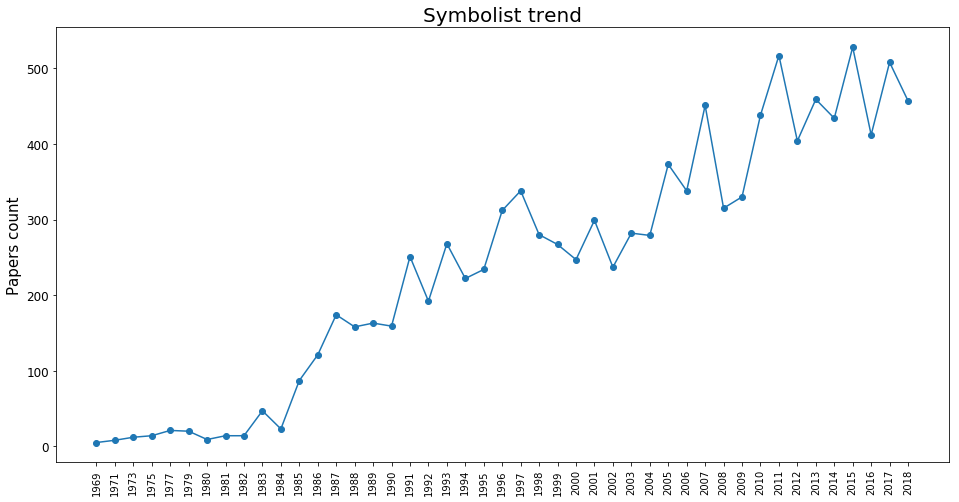

In [59]:
#------------Plot symbolic graph-------------------#
grouped_symbolic = symbolic.groupby('publication year').count().reset_index()
plt.figure(figsize=(16,8))
plt.title('Symbolist trend', size = 20)
plt.plot(grouped_symbolic['publication year'], grouped_symbolic['paper title'], marker = 'o')

plt.ylabel("Papers count", fontsize = 15)
plt.xticks(rotation='vertical')
plt.yticks(size = 12)
plt.xticks(rotation='vertical')
plt.show()

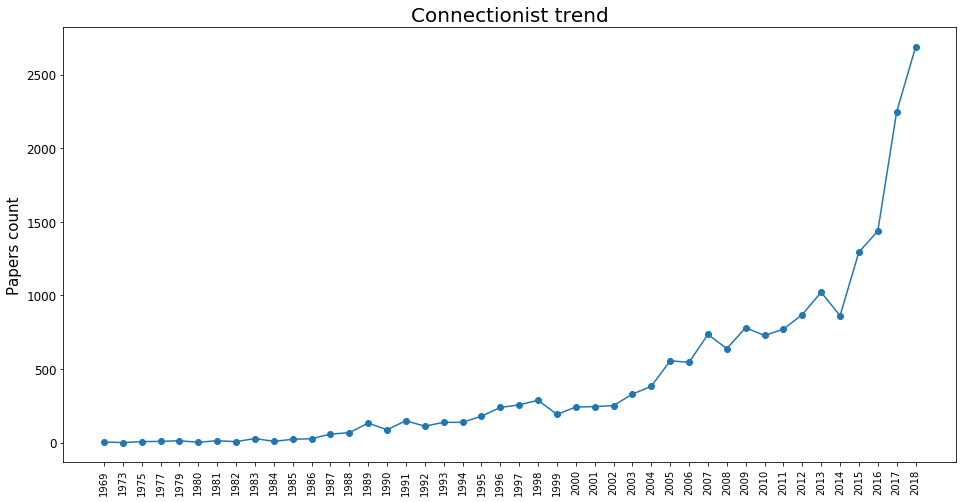

In [60]:
#------------Plot Connectionist graph-------------------#
grouped_connectionist = connectionist.groupby('publication year').count().reset_index()
plt.figure(figsize=(16,8))
plt.title('Connectionist trend', size = 20)
plt.plot(grouped_connectionist['publication year'], grouped_connectionist['paper title'], marker ='o')

plt.ylabel("Papers count", fontsize = 15)
plt.xticks(rotation='vertical')
plt.yticks(size = 12)
plt.xticks(rotation='vertical')
plt.show()

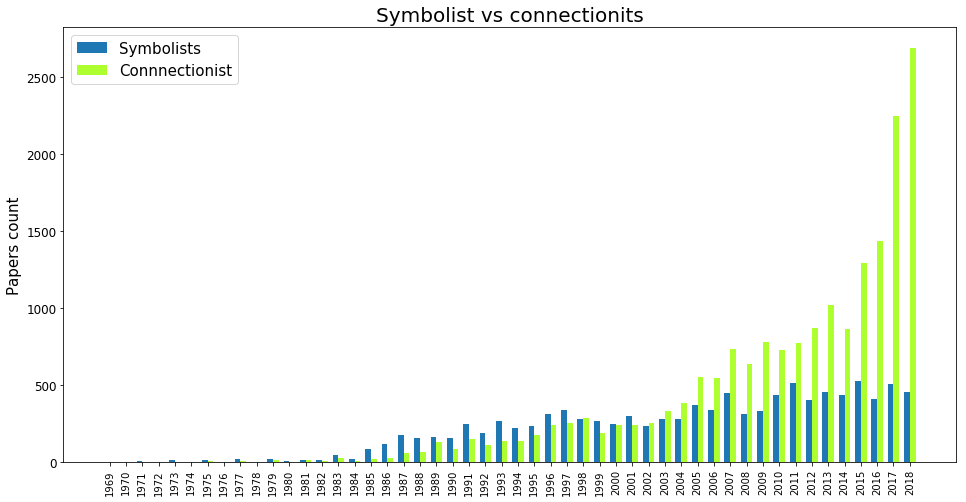

In [61]:
#----------------Comparison of the two trends--------------------#

papers_symbolist = []
papers_connectionist = []
years = []

#------------Fill in zeros for missing years in data-----------------#
for year in range(1969, 2019):
    years.append(year)
    found_year = False
    for i in range(len(grouped_connectionist['publication year'])):
        if(str(year) == grouped_connectionist['publication year'][i]):
            papers_connectionist.append(grouped_connectionist['paper title'][i])
            found_year = True
            break
    if(found_year == False):
        papers_connectionist.append(0)
        
    found_year = False
    for i in range(len(grouped_symbolic['publication year'])):
        if(str(year) == grouped_symbolic['publication year'][i]):
            papers_symbolist.append(grouped_symbolic['paper title'][i])
            found_year = True
            break
    if(found_year == False):
        papers_symbolist.append(0)
        
#-----------------------------END------------------------------------#

#-------------------------Figure plotting----------------------------#

N = len(years)
fig, ax = plt.subplots(figsize = (16,8))

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

p1 = ax.bar(ind, papers_symbolist, width, bottom=0)
p2 = ax.bar(ind + width, papers_connectionist, width, bottom=0, color = 'greenyellow')

ax.set_title('Symbolist vs connectionits', size = 20)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(years)
ax.set_ylabel("Papers count", fontsize = 15)

ax.legend((p1[0], p2[0]), ('Symbolists', 'Connnectionist'), fontsize = 15)
plt.xticks(rotation='vertical')
plt.yticks(size = 12)
ax.autoscale_view()

plt.show()

#-------------------------END Figure plotting-------------------------#

## Additional bar plot comparison

Combination of both trends side by side in a bar plot allows us to compare their evolution throughout the years. For the years with no papers in our database we set it to 0.

From 1969 to 1984 the popularity of both trends was slowly increasing. From 1984 to 1997 the Symbolist trend was more popular but the Connectionist trend was slowly catching up. In 2002 the number of papers was equal and since then the deep learning trend of Connectionists has taken over. We can even constate an exponential increase from 2014 to 2018.

With a bit of background of information we know that in 1969 the publication of a book “Perceptrons” by marvin Minsky which argued that single perception approach to neural networks could not be translated effectively into multi-layered neural networks, effectively burryied the field of neural networks for 12 years. This changed in 1982 with the introduction of Hopfield nets and first International Conference on Neural Networks by the Institute of Electrical and Electronic Engineers (IEEE) in 1987. We can observe the double increase of the papers from 1986 to 1987 from 27 to 58. The versatility of NN allowed it to gain major popularity in the AI field.

Our last plot shows us the ratio between the number of papers regarding Symbolist and Connectionist topics. We can clearly observe that during every year after 2003, more papers have talked about Connectionist themes. We can conclude that even though the Symbolist approach has been more popular until 2003, the topic of Neural Networks is more popular nowadays.


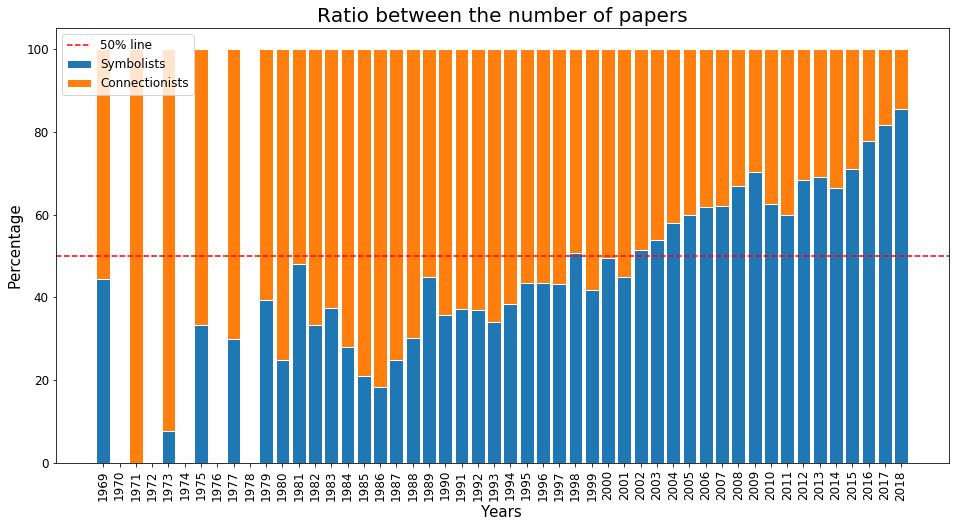

In [62]:
#---------Ratio comparison of the two trends--------#
plt.figure(figsize=(16,8))

# From data to percentage
totals = [i+j for i,j in zip(papers_symbolist, papers_connectionist)]
totals = [x if x > 0 else 1 for x in totals]
greenBars = [i / j * 100 for i,j in zip(papers_connectionist, totals)]
orangeBars = [i / j * 100 for i,j in zip(papers_symbolist, totals)]
 
#---------------Plotting--------------------------#
barWidth = 0.85
# Create connectionists Bars
plt.bar(years, greenBars, edgecolor='white', width=barWidth)
# Create symbolist Bars
plt.bar(years, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth)


plt.title('Ratio between the number of papers', size = 20)
plt.xticks(years, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(rotation='vertical')
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.axhline(y=50, color='r', linestyle='--')
plt.legend(['50% line','Symbolists','Connectionists' ], fontsize = 12)
plt.show()

#------------------------END Figure plotting------------------------#
